# Monte Carlo

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
import numpy as np
from numba import njit
import random
import math

In [ ]:
# Configurando a aparência dos gráficos
plt.rcParams['figure.figsize']  = (5, 5)
plt.rcParams['axes.labelsize']  = 10
plt.rcParams['axes.titlesize']  = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.facecolor'] = '#FFFFFF'

In [ ]:
#define aqui cada f(x)
@njit()
def f(x): return 1 - x**2
@njit()
def g(x): return np.exp(x)
@njit()
def h(x): return np.sin(x)**2

In [ ]:
@njit()
def monte_carlo(a, b, max_y, callback, N):
    x_in = np.empty(N, dtype=np.float64)
    y_in = np.empty(N, dtype=np.float64)
    x_out = np.empty(N, dtype=np.float64)
    y_out = np.empty(N, dtype=np.float64)
    hits = 0
    misses = 0

    for i in range(N):
        x_tmp = random.uniform(a, b)
        y_tmp = random.uniform(0, max_y)

        if(y_tmp < callback(x_tmp)):
            x_in[hits] = x_tmp
            y_in[hits] = y_tmp
            hits += 1
        else:
            x_out[misses] = x_tmp
            y_out[misses] = y_tmp
            misses += 1


    result = (hits / N) * ((b-a) * max_y)
    return result, x_in[:hits], y_in[:hits], x_out[:misses], y_out[:misses]

In [ ]:
def plot(a, b, callback, N):
    x = np.linspace(a, b, N)
    y = callback(x)

    plt.plot(x, y, 'k', linewidth=3)

    # Constroi o retangulo
    max_y = max(y)
    rect = mpatches.Rectangle((a, 0), b-a, max_y,
                            fill = False,
                            color = "red",
                            linewidth = 3)
    plt.gca().add_patch(rect)

    result, x_in, y_in, x_out, y_out = (
        monte_carlo(a, b, max_y, callback, N)
    )

    # Exibe pontos aleatorios
    plt.scatter(x_in, y_in, s=1, marker='.')
    plt.scatter(x_out, y_out, s=1, marker='.')
    plt.title(f"N-total: {N}")
    # despine(plt.gca())
    plt.show()

    return result

In [ ]:
def plot_hist(a, b, start, end,  callback, N_est, N_total):
    res_array = np.zeros(N_est)
    x = np.linspace(a, b, N_total)
    y = callback(x)
    max_y = max(y)

    for i in range(N_est):
        res_array[i] = monte_carlo(a, b, max_y, callback, N_total)[0]

    plt.hist(res_array, bins=40, edgecolor='k', density=True)
    plt.xlim(start, end)
    res = stats.norm(loc=res_array.mean(), scale=res_array.std())
    res_np = np.linspace(res.ppf(0.001), res.ppf(0.999),10000)
    plt.plot(res_np, res.pdf(res_np))
    plt.title(f"N-total: {N_total}")
    # despine(plt.gca())
    plt.show()

In [ ]:
def plot_erro(a, b, callback, y_true, N_est):
    res_y = np.zeros(N_est)
    res_x = np.zeros(N_est)
    x = np.linspace(a, b, N_est)
    y = callback(x)
    max_y = max(y)

    for i in range(N_est):
        res_y[i] = monte_carlo(a, b, max_y, callback, i+1)[0]
        res_x[i] = i+1

    res_y = (res_y - y_true) ** 2
    plt.plot(res_x, res_y, 'k', linewidth=3)
    plt.ylabel('(Valor Analítico - Predição)$^2$')
    plt.xlabel('N - total')
    plt.grid()
    plt.show()

## Integrais

### Integral 1


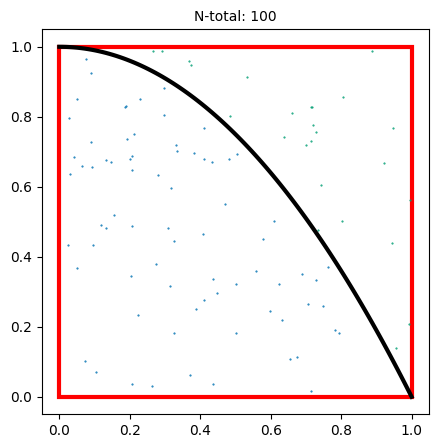

Predição 0.75
Valor Analítico 0.6666666666666666


In [ ]:
result = plot(0, 1, f, 100)
print("Predição", result)
print("Valor Analítico", 2/3)

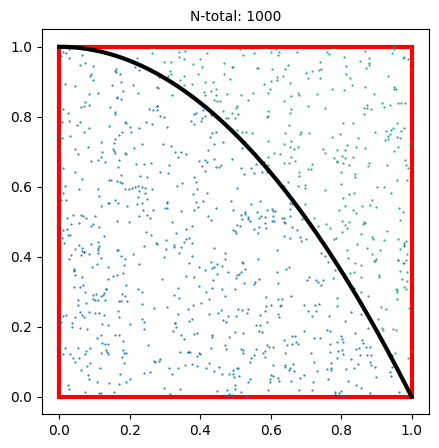

Predição 0.69
Valor Analítico 0.6666666666666666


In [ ]:
result = plot(0, 1, f, 1000)
print("Predição", result)
print("Valor Analítico", 2/3)

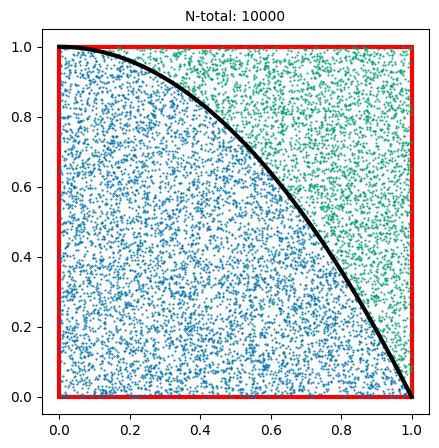

Predição 0.6609
Valor Analítico 0.6666666666666666


In [ ]:
result = plot(0, 1, f, 10000)
print("Predição", result)
print("Valor Analítico", 2/3)

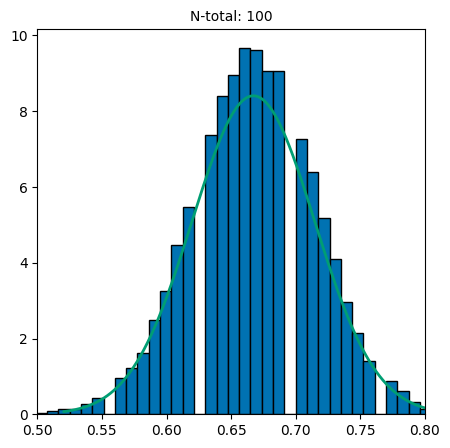

In [ ]:
plot_hist(0, 1, 0.500, 0.800, f, 10000, 100)

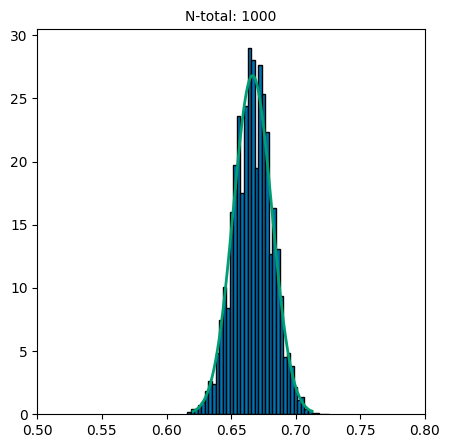

In [ ]:
plot_hist(0, 1, 0.500, 0.800, f, 10000, 1000)

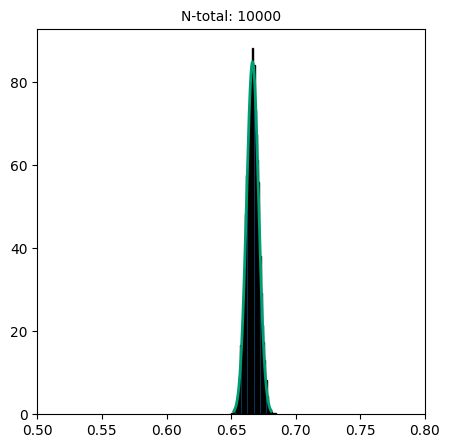

In [ ]:
plot_hist(0, 1, 0.500, 0.800, f, 10000, 10000)

### Integral 2

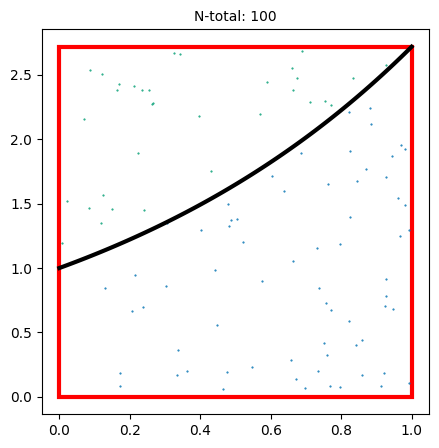

Predição 1.8212488250675603
Valor Analítico 1.718281828459045


In [ ]:
result = plot(0, 1, g, 100)
print("Predição", result)
print("Valor Analítico", math.e-1)

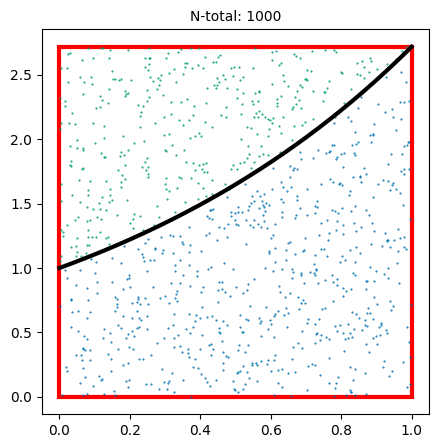

Predição 1.7152358337576574
Valor Analítico 1.718281828459045


In [ ]:
result = plot(0, 1, g, 1000)
print("Predição", result)
print("Valor Analítico", math.e-1)

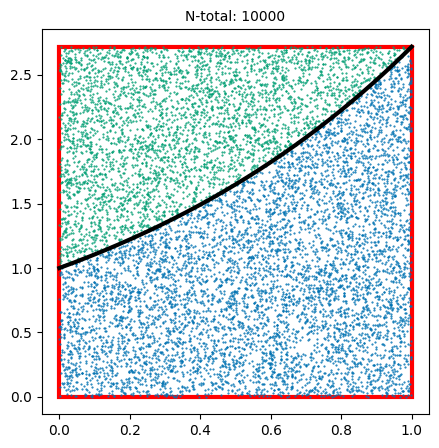

Predição 1.7239343356087264
Valor Analítico 1.718281828459045


In [ ]:
result = plot(0, 1, g, 10000)
print("Predição", result)
print("Valor Analítico", math.e-1)

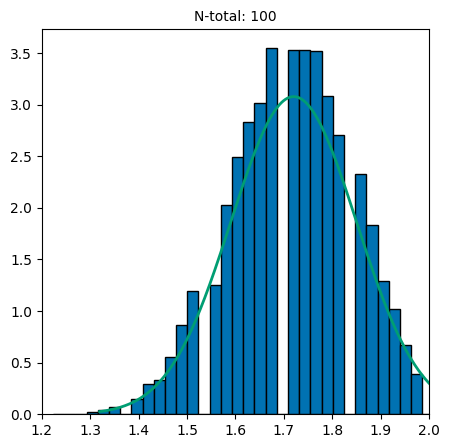

In [ ]:
plot_hist(0, 1, 1.2, 2.0, g, 10000, 100)

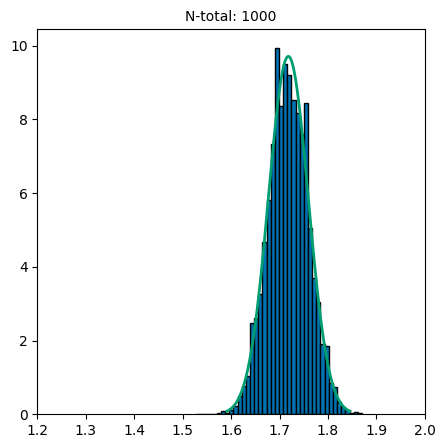

In [ ]:
plot_hist(0, 1, 1.2, 2.0, g, 10000, 1000)

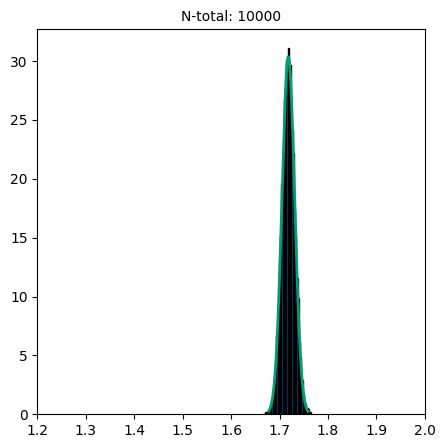

In [ ]:
plot_hist(0, 1, 1.2, 2.0, g, 10000, 10000)

### Integral 3

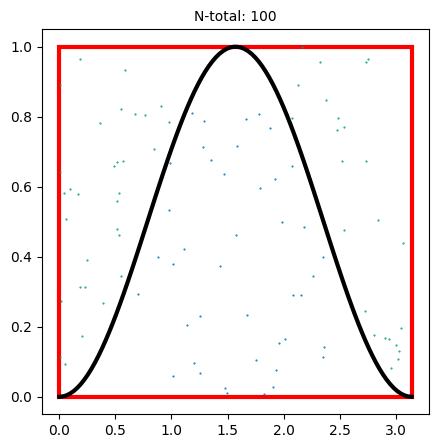

Predição 1.3191367661701334
Valor Analítico 1.5707963267948966


In [ ]:
result = plot(0, np.pi, h, 100)
print("Predição", result)
print("Valor Analítico", np.pi / 2)

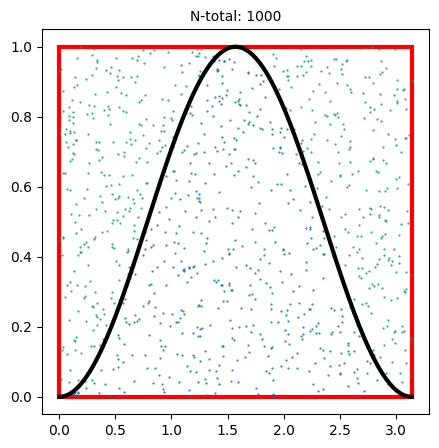

Predição 1.539376594385294
Valor Analítico 1.5707963267948966


In [ ]:
result = plot(0, np.pi, h, 1000)
print("Predição", result)
print("Valor Analítico", np.pi / 2)

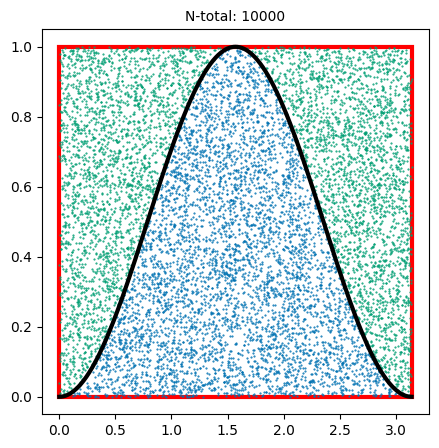

Predição 1.5729954028325395
Valor Analítico 1.5707963267948966


In [ ]:
result = plot(0, np.pi, h, 10000)
print("Predição", result)
print("Valor Analítico", np.pi / 2)

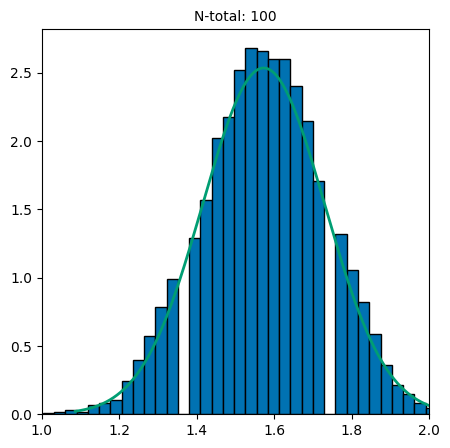

In [ ]:
plot_hist(0, np.pi, 1, 2, h, 10000, 100)

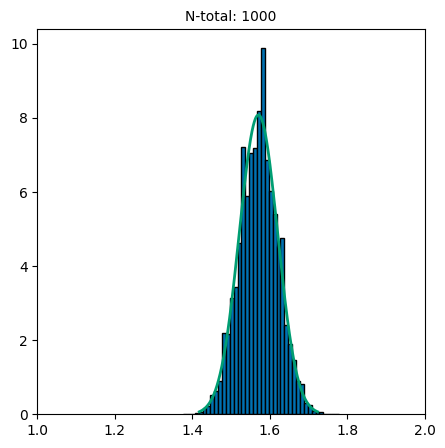

In [ ]:
plot_hist(0, np.pi, 1, 2, h, 10000, 1000)

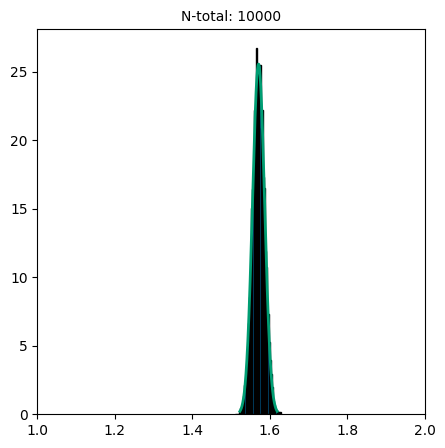

In [ ]:
plot_hist(0, np.pi, 1, 2, h, 10000, 10000)

### Análise dos resultados

A partir dos resultados obtidos, foi possível concluir que, conforme o número de amostras aumenta, a distribuição das estimativas se torna mais centrada no resultado analítico. Esse fato é evidenciado pela tendência de "afinamento" dos histogramas. Em outras palavras, com o aumento da amostragem, a média da distribuição se aproxima do valor real e o desvio padrão se reduz.

Essa conclusão respalda a lei dos grandes números, que associa justamente tamanho da amostragem à confiabilidade dos resultados.

## Erros

### Integral 1

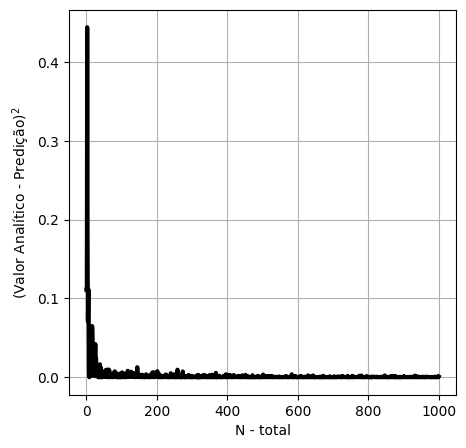

In [ ]:
plot_erro(0, 1, f, 2/3, 1000)

### Integral 2

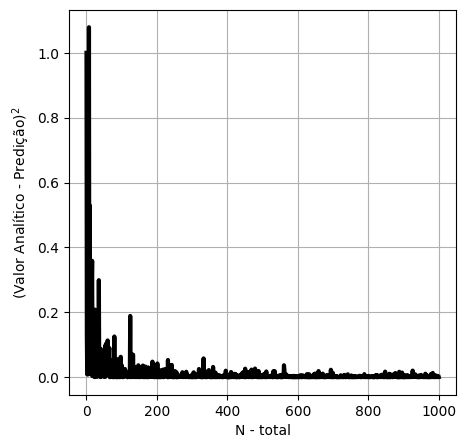

In [ ]:
plot_erro(0, 1, g, math.e-1, 1000)

### Integral 3

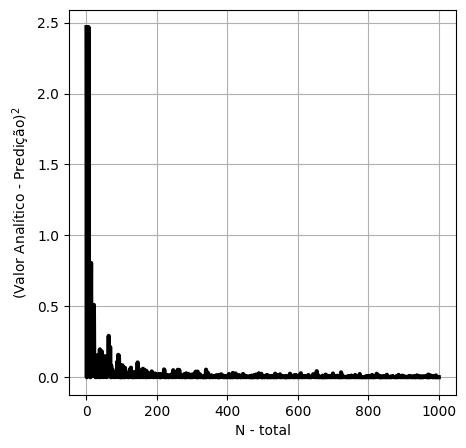

In [ ]:
plot_erro(0, np.pi, h, np.pi/2, 1000)

### Análise dos resultados

Os erros dos resultados estatísticos também seguiram as expectativas previstas pela Lei dos grandes números. À medida que o número de amostras cresce, a tendência é que o erro se aproxime cada vez mais de zero, levando em conta que os resultados obtidos se aproximam dos analíticos.